In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv(r"C:\Users\HP\Downloads\ai_ghibli_trend_dataset_v2 (1).csv")
df.shape

(200, 3)

In [25]:
df.head()

,generation_time,gpu_usage,style_accuracy_score
0,4.80,49,89
1,11.11,81,92
2,5.56,41,61
3,12.45,88,76
4,4.80,64,58


In [26]:
df.tail()


,generation_time,gpu_usage,style_accuracy_score
195,3.78,49,59
196,12.20,77,94
197,6.80,44,56
198,4.76,65,73
199,4.78,78,75


In [27]:
df.describe()

,generation_time,gpu_usage,style_accuracy_score
count,200.000000,200.000000,200.000000
mean,7.593850,60.720000,74.015000
std,3.861615,18.299892,15.252474
min,1.540000,30.000000,50.000000
25%,4.467500,44.000000,61.000000
50%,7.175000,62.500000,73.000000
75%,10.830000,77.000000,89.000000
max,14.930000,90.000000,100.000000


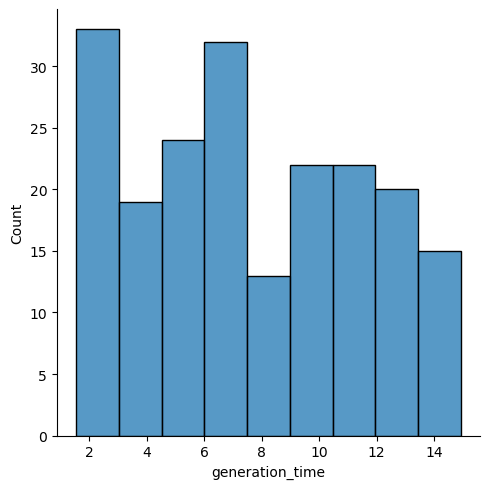

In [28]:
sns.displot(df.generation_time);

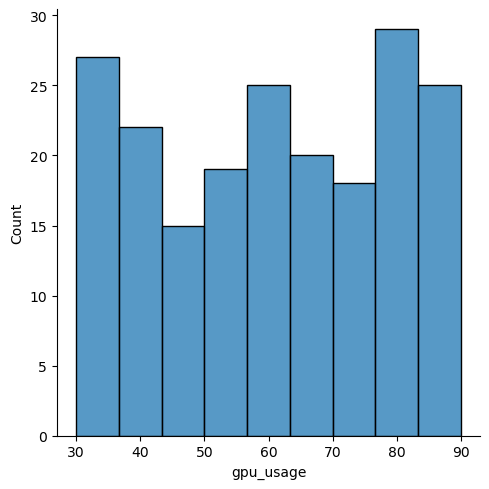

In [29]:
sns.displot(df.gpu_usage);	

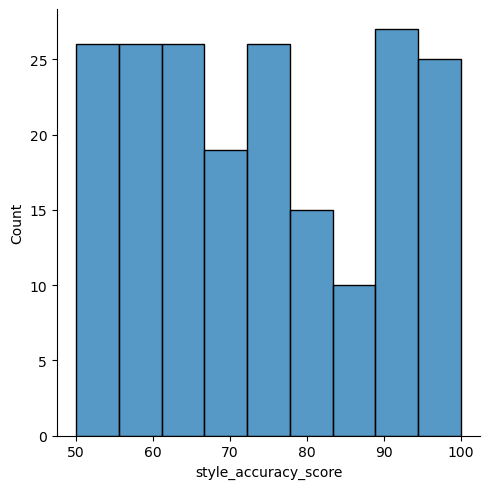

In [30]:
sns.displot(df.style_accuracy_score);

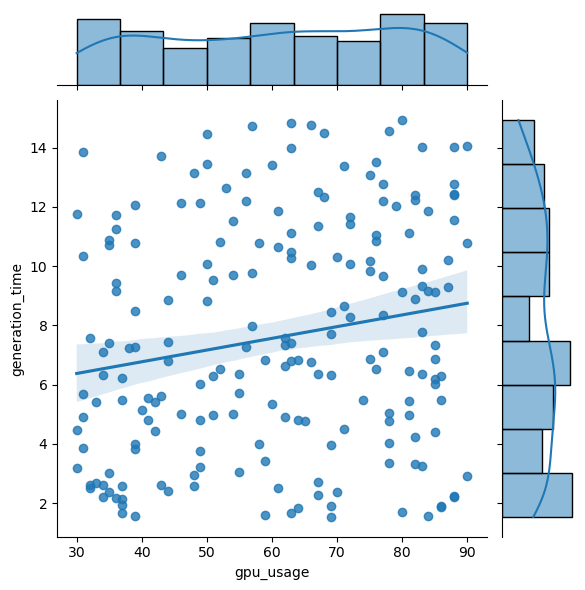

In [31]:
sns.jointplot(x='gpu_usage',y='generation_time',data=df,kind='reg')

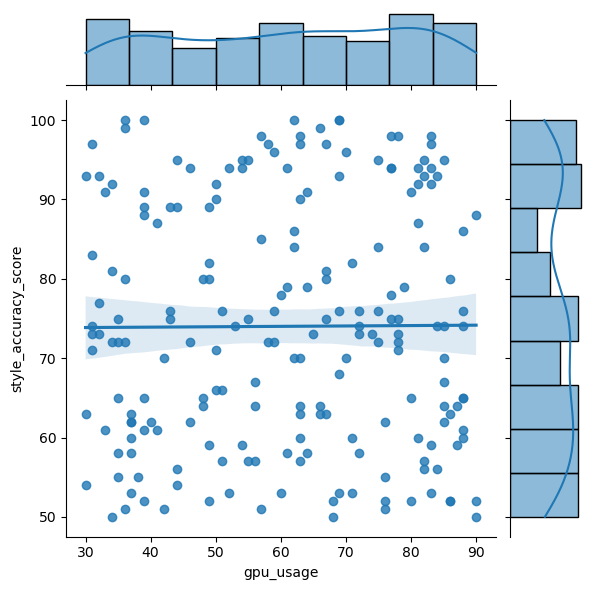

In [32]:
sns.jointplot(x='gpu_usage',y='style_accuracy_score',data=df,kind='reg')

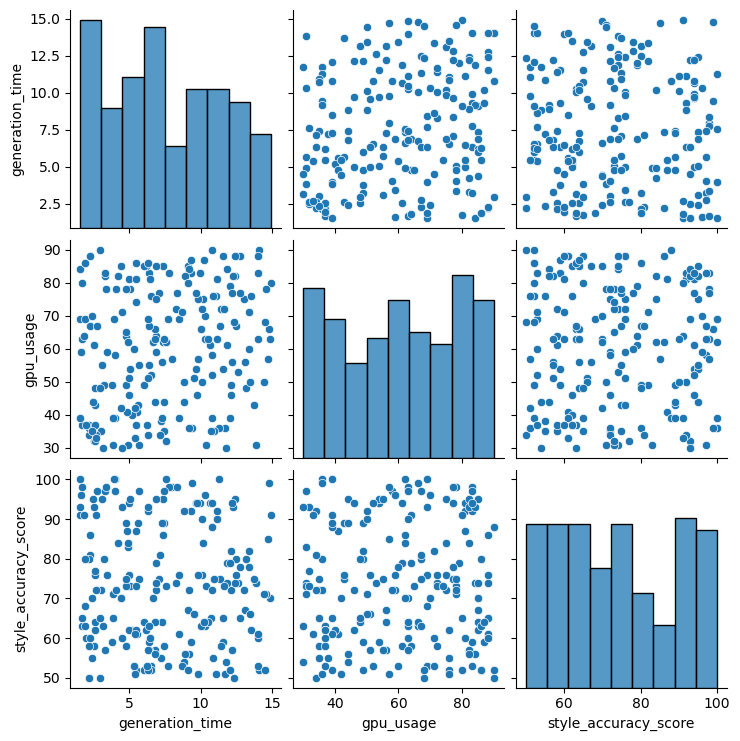

In [33]:
sns.pairplot(df)

In [34]:
df.corr()

,generation_time,gpu_usage,style_accuracy_score
generation_time,1.000000,0.187263,-0.062016
gpu_usage,0.187263,1.000000,0.005956
style_accuracy_score,-0.062016,0.005956,1.000000


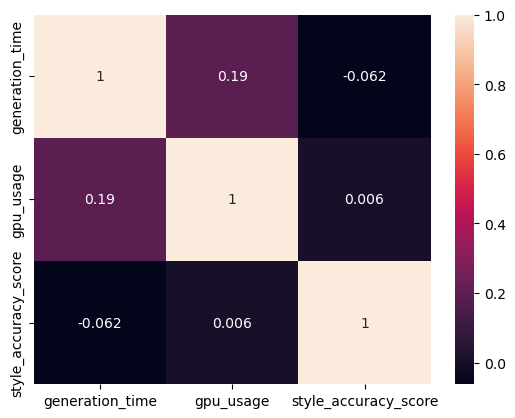

In [35]:
sns.heatmap(df.corr(),annot=True);

In [36]:
df.head()

,generation_time,gpu_usage,style_accuracy_score
0,4.80,49,89
1,11.11,81,92
2,5.56,41,61
3,12.45,88,76
4,4.80,64,58


In [37]:
df.columns

Index(['generation_time', 'gpu_usage', 'style_accuracy_score'], dtype='object')

In [50]:
X=df[['generation_time','style_accuracy_score']]
X.head()


,generation_time,style_accuracy_score
0,4.80,89
1,11.11,92
2,5.56,61
3,12.45,76
4,4.80,58


In [48]:
Y=df['gpu_usage']
Y

0      49
1      81
2      41
3      88
4      64
       ..
195    49
196    77
197    44
198    65
199    78
Name: gpu_usage, Length: 200, dtype: int64

In [49]:
X.shape

(200, 2)

In [52]:
X=df[['generation_time','style_accuracy_score']]
Y=df['gpu_usage']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [53]:
X_train.shape

(120, 2)

In [54]:
X_test.shape

(80, 2)

In [55]:
Y_train.shape

(120,)

In [56]:
Y_test.shape

(80,)

In [57]:
X_train.head()

,generation_time,style_accuracy_score
39,2.20,50
164,14.73,85
17,7.71,53
57,6.63,70
165,13.46,66


In [58]:
X_test.head()

,generation_time,style_accuracy_score
112,5.02,95
4,4.80,58
176,2.73,97
96,5.68,97
186,9.66,94


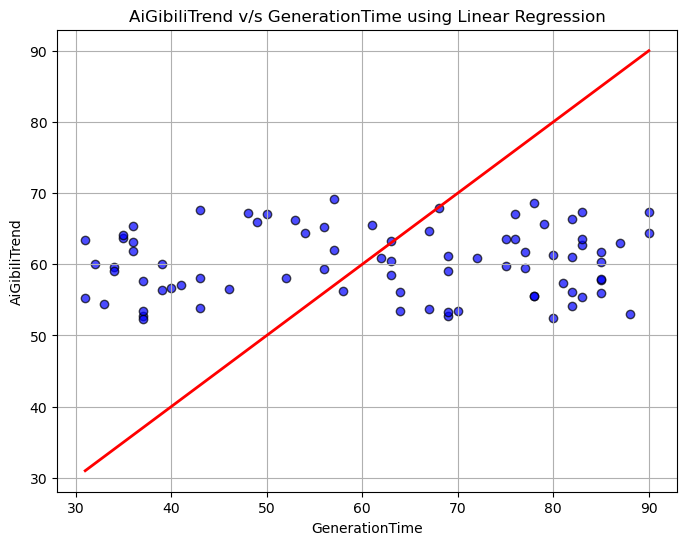

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

X=df[['generation_time','style_accuracy_score']]
Y=df['gpu_usage']
#spliting the model

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

#Train the Model
model=LinearRegression()
model.fit(X_train,Y_train)

#predict 
Y_pred=model.predict(X_test)


#plot
Y_pred=model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred,color='blue',edgecolor='k',alpha=0.7)
plt.xlabel('GenerationTime')
plt.ylabel('AiGibiliTrend')
plt.title("AiGibiliTrend v/s GenerationTime using Linear Regression")
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red',linewidth=2)
plt.grid(True)
plt.show()
